In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 3, 1)

df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price             Close         High          Low         Open       Volume
Ticker     POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
Date                                                                       
2007-10-05    32.385578    35.250705    26.768000    28.908797    855215656
2007-10-08    30.727671    33.480123    30.534515    33.480123    126671715
2007-10-09    32.820179    33.109910    29.085858    30.743766    116725709
2007-10-10    33.125999    33.802041    32.836269    33.673270     67931378
2007-10-11    36.828140    38.630917    32.836281    38.630917    106320954

In [4]:
df.shape

(4291, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4291 entries, 2007-10-05 to 2025-02-28
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4291 non-null   float64
 1   (High, POWERGRID.NS)    4291 non-null   float64
 2   (Low, POWERGRID.NS)     4291 non-null   float64
 3   (Open, POWERGRID.NS)    4291 non-null   float64
 4   (Volume, POWERGRID.NS)  4291 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 201.1 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price         Close         High          Low         Open        Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS  POWERGRID.NS
count   4291.000000  4291.000000  4291.000000  4291.000000  4.291000e+03
mean      83.523061    84.612443    82.454005    83.568683  1.191530e+07
std       70.021494    70.864750    69.156810    70.030186  2.043883e+07
min       18.908405    20.212433    16.952364    20.114630  0.000000e+00
25%       36.471354    37.007765    35.959903    36.540496  4.855060e+06
50%       58.374226    58.690971    57.256277    58.057473  8.435793e+06
75%       84.276451    85.276531    83.331403    84.574152  1.372515e+07
max      356.113861   356.893408   348.074624   354.749603  8.552157e+08

In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

Price        Date               Close                High  \
0  Ticker         NaN        POWERGRID.NS        POWERGRID.NS   
1       0  2007-10-05   32.38557815551758  35.250704510369104   
2       1  2007-10-08  30.727670669555664  33.480122790770764   
3       2  2007-10-09    32.8201789855957  33.109909879074095   
4       3  2007-10-10  33.125999450683594   33.80204096867718   

                  Low                Open        Volume  
0        POWERGRID.NS        POWERGRID.NS  POWERGRID.NS  
1  26.767999775913133  28.908796765471156     855215656  
2  30.534515292099577  33.480122790770764     126671715  
3   29.08585756305142  30.743766243977518     116725709  
4   32.83626861907928   33.67327001215155      67931378

In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

/tmp/ipykernel_44172/270396694.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



KeyError: 'Adj Close'

In [16]:
df.head()

Price        Date        Close         High          Low         Open  \
Ticker            POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS   
0      2007-10-05    32.385578    35.250705    26.768000    28.908797   
1      2007-10-08    30.727671    33.480123    30.534515    33.480123   
2      2007-10-09    32.820179    33.109910    29.085858    30.743766   
3      2007-10-10    33.125999    33.802041    32.836269    33.673270   
4      2007-10-11    36.828140    38.630917    32.836281    38.630917   

Price        Volume  
Ticker POWERGRID.NS  
0         855215656  
1         126671715  
2         116725709  
3          67931378  
4         106320954

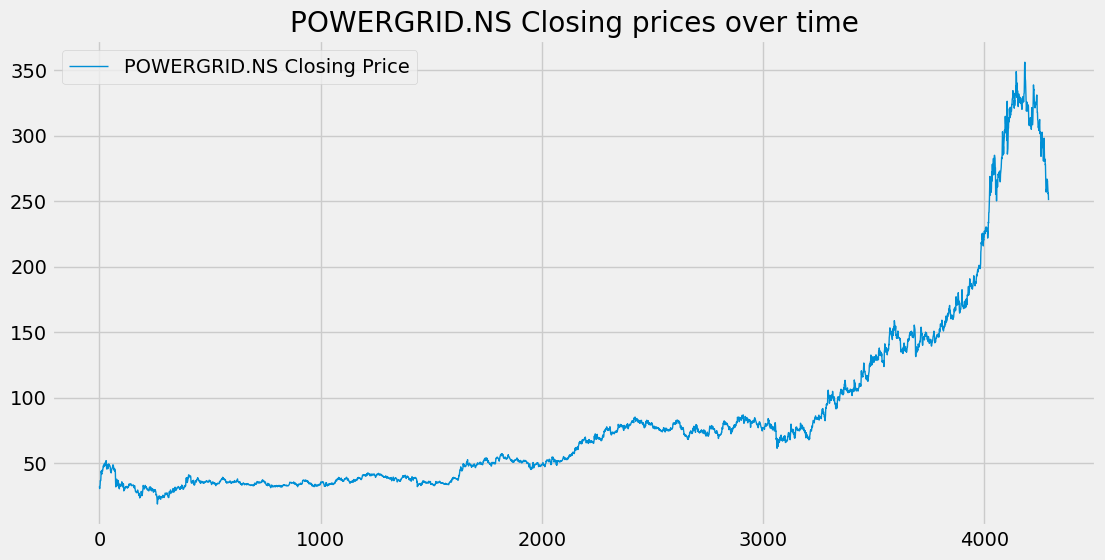

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

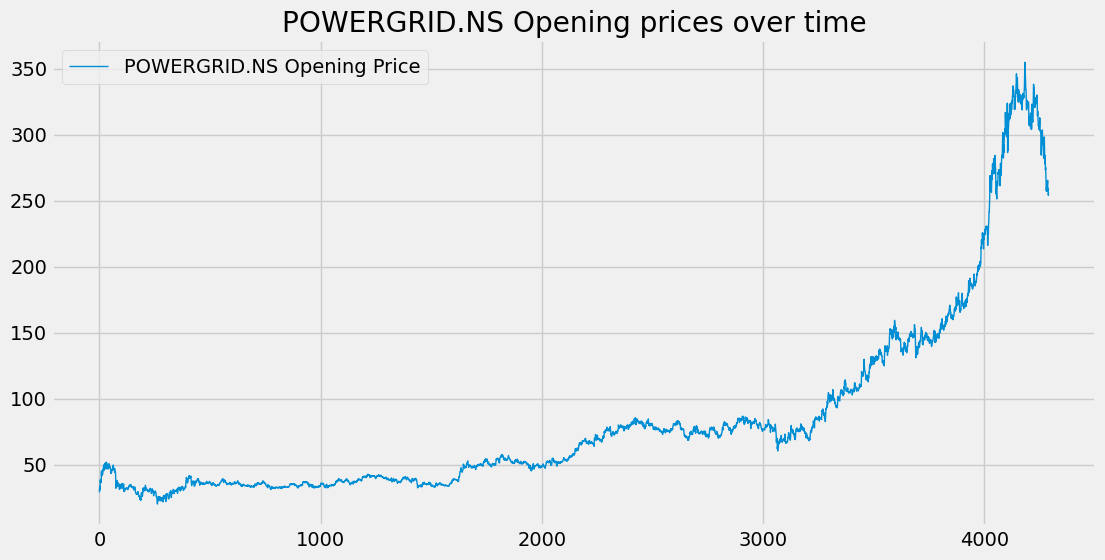

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

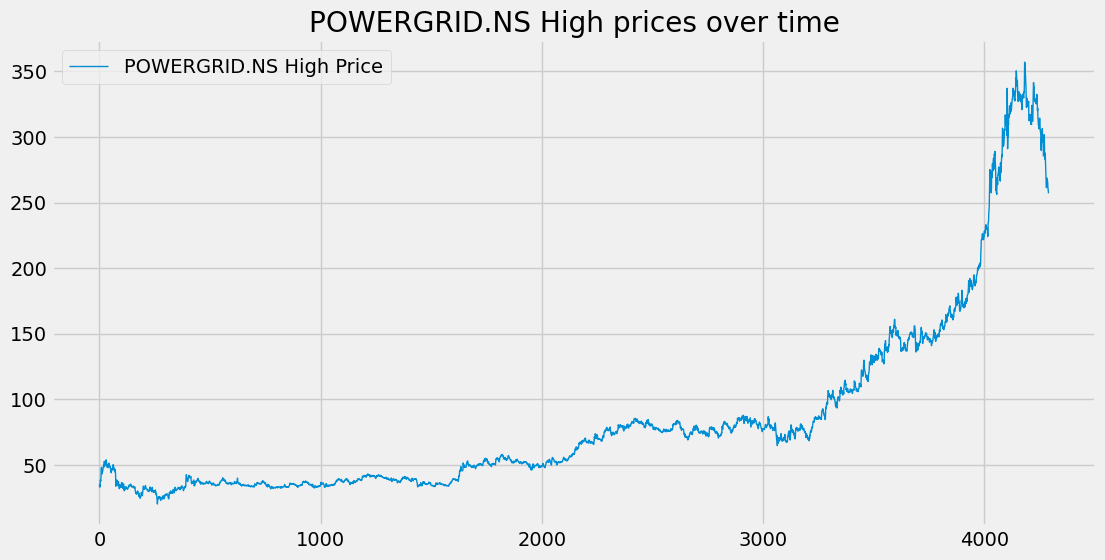

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

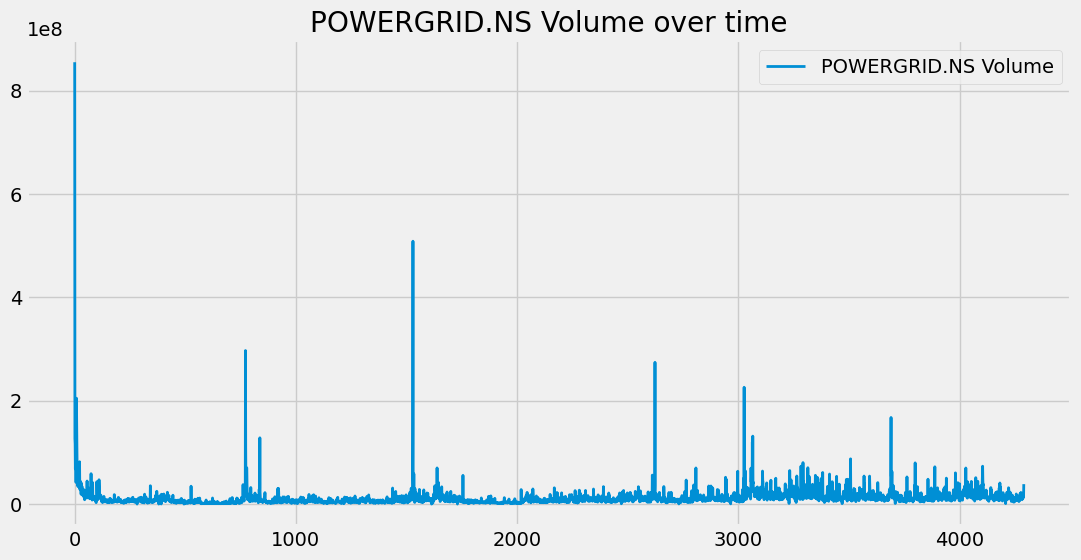

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [21]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [22]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [23]:
df01.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [24]:
ma100 = df.Close.rolling(100).mean()

In [25]:
ma100

Ticker  POWERGRID.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
4286      305.590281
4287      304.828201
4288      304.083767
4289      303.440804
4290      302.761381

[4291 rows x 1 columns]

In [26]:
ma200 = df.Close.rolling(200).mean()

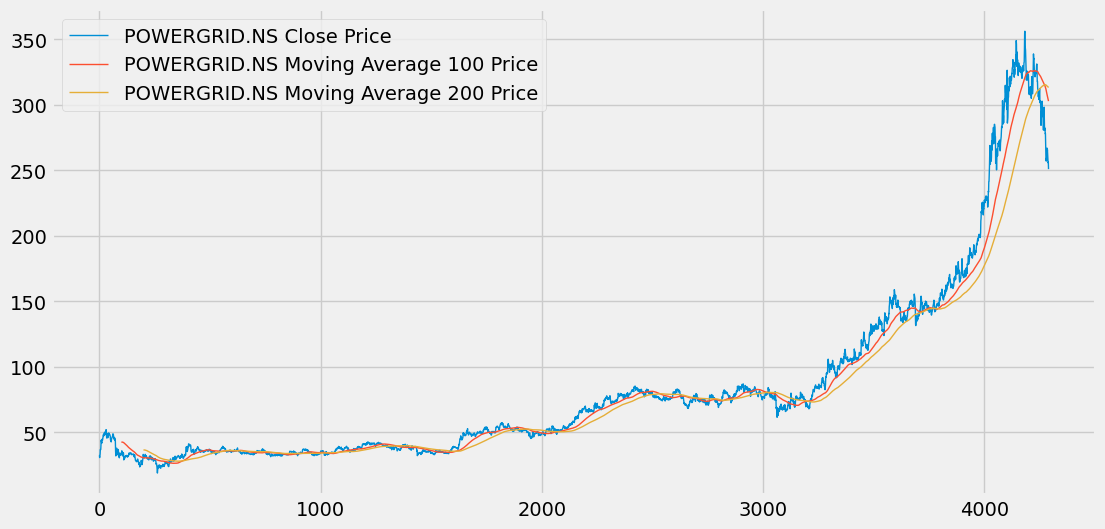

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [28]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [29]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

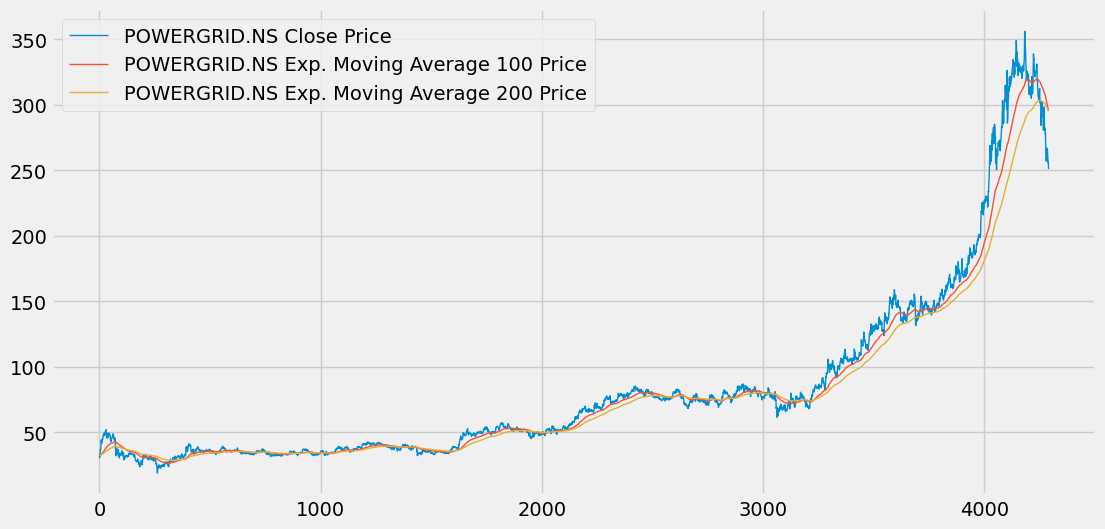

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [31]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [32]:
data_training.shape

(3003, 1)

In [33]:
data_testing.shape

(1288, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [35]:
data_training_array = scaler.fit_transform(data_training)

In [36]:
data_training_array

array([[0.19808607],
       [0.17371832],
       [0.20447379],
       ...,
       [0.85849306],
       [0.85335634],
       [0.84852193]])

In [37]:
data_training_array.shape[0]

3003

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [41]:
x_train.shape

(2903, 100, 1)

In [43]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [44]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2025-03-16 10:30:47.677472: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - loss: 0.0942
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - loss: 0.0089
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 0.0092
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0087
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 0.0069
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - loss: 0.0076
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 0.0066
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - loss: 0.0056
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0057
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0062
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0042
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0049
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.0048
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 0.0045
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [49]:
past_100_days = data_training.tail(100)

In [50]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [51]:
final_df.head()

Ticker  POWERGRID.NS
0          85.503029
1          85.238937
2          86.600014
3          85.949936
4          84.466988

In [52]:
input_data = scaler.fit_transform(final_df)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [54]:
x_test.shape

(1288, 100, 1)

In [55]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [56]:
y_predicted.shape

(1288, 1)

In [57]:
scaler.scale_

array([0.00339369])

In [58]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

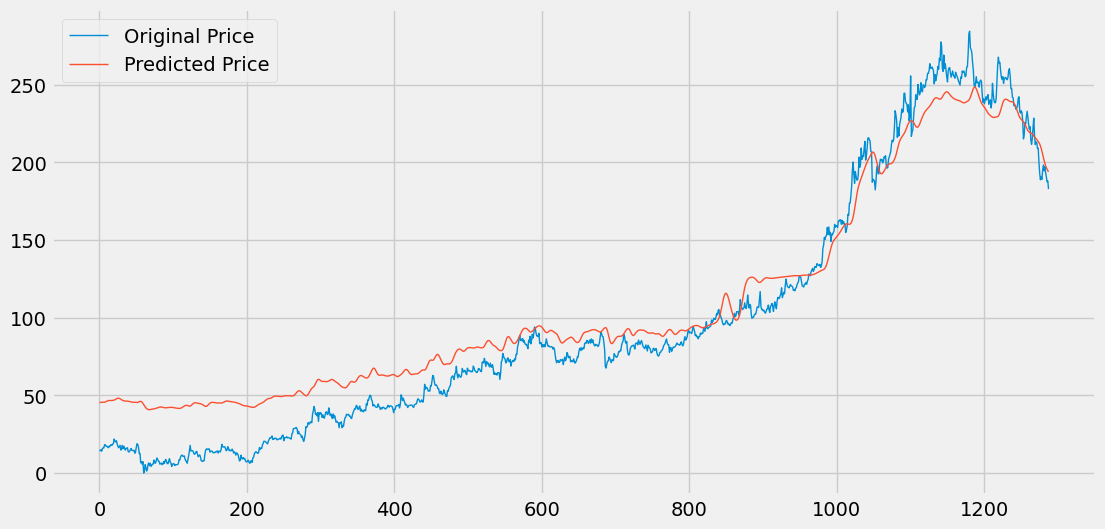

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [61]:
model.save('stock_dl_model.h5')